# Análisis de Clustering Jerarquico y Aglomerativo

El clustering o agrupamiento es una técnica de aprendizaje automático no supervisado, cuyo objetivo es ordenar objetos definidos por un conjunto de variables en grupos, de forma que los elementos sean lo más homogéneos posibles.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 
import pylab
import scipy.stats as stats
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 
%matplotlib inline

In [4]:
Estudiantes = pd.read_csv ('C:/Users/pc/Archivos en Jupyter/TECNOLOGICO DE MONTERREY/DataSetAlumnos25.3.csv', engine ='python', 
index_col=0)

In [5]:
Estudiantes.head()

,generation,educationalmodel,level,gender,age,maxdegreeparents,fathereducationcomplete,fathereducationsummary,mothereducationcomplete,mothereducationsummary,...,averagefirstperiod,failedsubjectfirstperiod,droppedsubjectfirstperiod,dropoutsemester,totallifeactivities,athleticsports,artculture,studentsocietyleadership,lifeworkmentoring,wellnessactivities
student.id,,,,,,,,,,,,,,,,,,,,,
426,19,1,2,1,18,2,8,2,7,1,...,81.00,0,0,0,1,1,2,2,2,2
442,19,1,2,1,18,3,5,3,5,3,...,92.00,0,0,0,1,1,2,2,2,2
498,19,1,2,2,17,3,8,2,5,3,...,93.00,0,0,0,2,1,2,1,2,2
542,20,1,2,1,18,2,1,1,8,2,...,94.00,0,0,0,2,2,2,1,2,1
567,20,1,2,2,18,3,5,3,8,2,...,92.66,0,0,0,3,2,1,1,2,1


In [ ]:
from sklearn.preprocessing import normalize

#Normalización de los datos
data_scaled = normalize(Estudiantes)
data_scaled = pd.DataFrame (data_scaled, columns= Estudiantes.columns)
data_scaled.head()

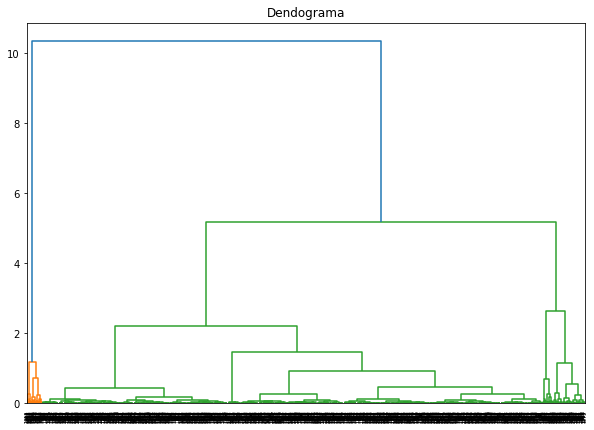

In [6]:
plt.figure(figsize =(10,7))
plt.title('Dendograma')
dend = shc.dendrogram (shc.linkage(data_scaled, method='ward'))

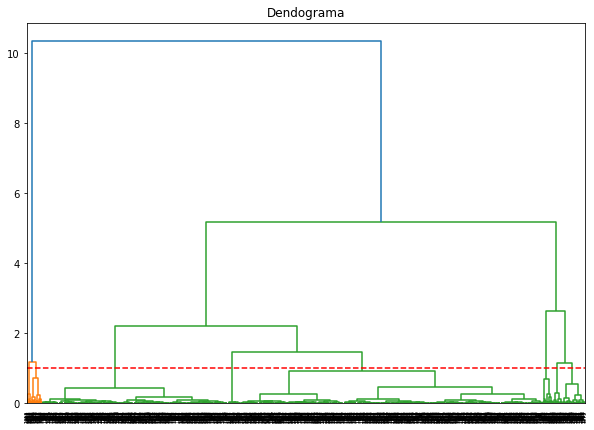

In [22]:
# Realizamos el corte segun los grupos que quremos obtener
plt.figure (figsize=(10,7))
plt.title('Dendograma')
z= shc.linkage(data_scaled, method='ward')
dend= shc.dendrogram( z )
plt.axhline (y= 1 , color='r', linestyle='--')
plt.show()

In [18]:
# Realizamos el clustering Aglomerativo
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering (n_clusters=3, affinity ='euclidean', linkage ='ward')
cluster.fit_predict(data_scaled)
#Estudiantes ['clusteringaglometarivo'] = cluster.fit_predict(data_scaled)

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

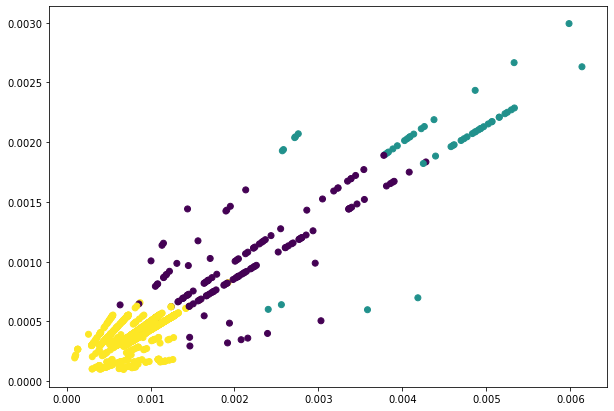

In [22]:
#Plotemos los resultados normalizados
cluster.labels_
plt.figure (figsize=(10,7))
plt.scatter (data_scaled.socioeconomiclevel, data_scaled.zonetype, c=cluster.labels_)

In [53]:
# Realizamos el clustering Jerarquico
cluster2 = fcluster (z, t=6 , criterion= 'distance')
cluster2

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

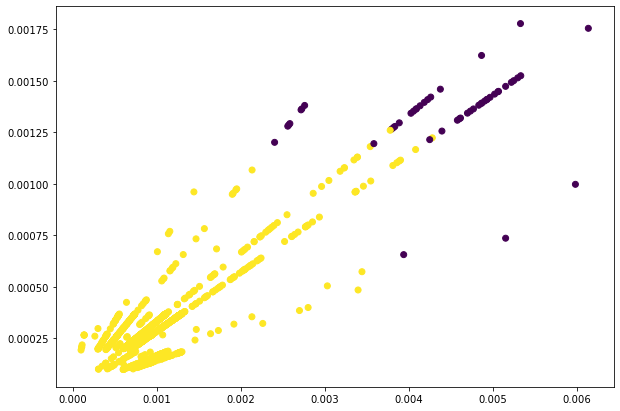

In [54]:
plt.figure (figsize=(10,7))
plt.scatter (data_scaled.socioeconomiclevel, data_scaled.firstgeneration, c=cluster2)

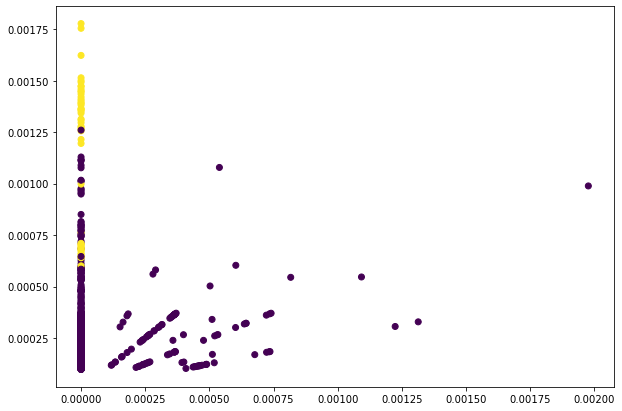

In [18]:
from sklearn.cluster import AgglomerativeClustering
cluster3 = AgglomerativeClustering (n_clusters=2, affinity ='euclidean', linkage ='ward')
cluster3.fit_predict(data_scaled)
cluster3.labels_
plt.figure (figsize=(10,7))
plt.scatter (data_scaled.dropoutsemester, data_scaled.gender, c=cluster3.labels_)

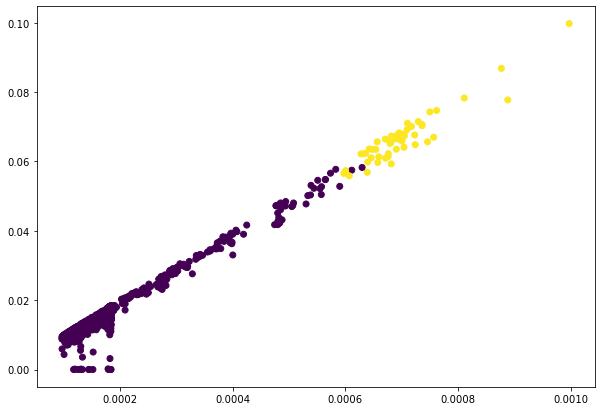

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster4 = AgglomerativeClustering (n_clusters=2, affinity ='euclidean', linkage ='ward')
cluster4.fit_predict(data_scaled)
cluster4.labels_
plt.figure (figsize=(10,7))
plt.scatter (data_scaled.educationalmodel, data_scaled.averagefirstperiod, c=cluster4.labels_)

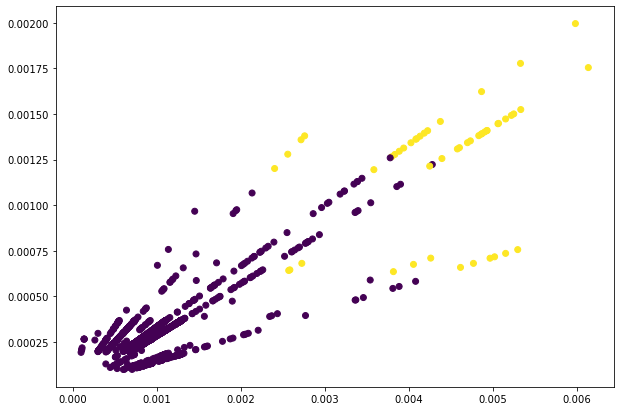

In [24]:
cluster5 = AgglomerativeClustering (n_clusters=2, affinity ='euclidean', linkage ='ward')
cluster5.fit_predict(data_scaled)
cluster5.labels_
plt.figure (figsize=(10,7))
plt.scatter (data_scaled.socioeconomiclevel, data_scaled.parentsexatec, c=cluster5.labels_)

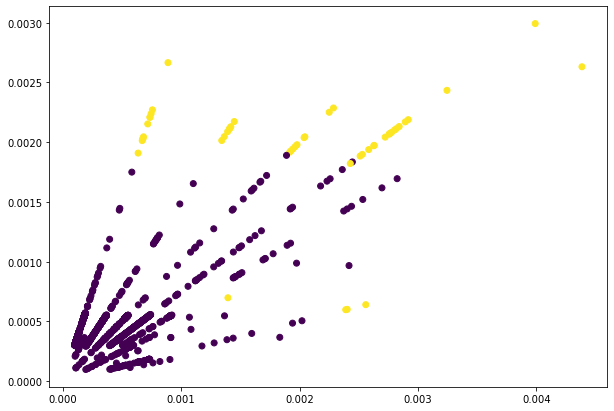

In [27]:
cluster6 = AgglomerativeClustering (n_clusters=4, affinity ='euclidean', linkage ='ward')
cluster6.fit_predict(data_scaled)
cluster6.labels_
plt.figure (figsize=(10,7))
plt.scatter (data_scaled.region, data_scaled.zonetype, c=cluster5.labels_)